In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train_data=pd.read_csv("training.csv")
test_data=pd.read_csv("test.csv")
lookid_data=pd.read_csv("IdLookupTable.csv")

In [3]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


In [4]:
# null값 찾기
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [5]:
# null값 채우기
train_data.fillna(method = 'ffill',inplace = True)

In [6]:
# 잘 채워졌는지 확인
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [7]:
# 결측값이 없으므로 레이블과 기능을 분리할 수 있음.!
# 이미지 열값은 문자열 형식 / 누락된 값도 있으므로 문자열을 공백으로 분할
# 누락된 값도 처리
imag = []
for i in range(0, 7049):
  img = train_data['Image'][i].split(' ')
  img = ['0' if x == '' else x for x in img]
  imag.append(img)

In [8]:
# float 타입으로 변경
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

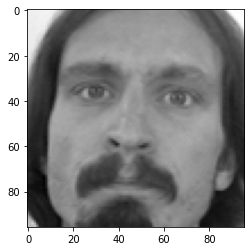

In [9]:
# 첫번째 이미지 확인
plt.imshow(X_train[0].reshape(96,96),cmap='gray')
plt.show()

In [10]:
# 레이블 분리 가능
# Image(컬럼) 드롭!
training=train_data.drop('Image', axis=1)

# y컬럼만 잘라냄
y_train = []
for i in range(0, 7049):
    y=training.iloc[i,:]
    
    y_train.append(y)
y_train=np.array(y_train, dtype='float')

In [11]:
import keras

In [12]:
# 학습할 준비가 끝났음
# 모델 정의
# keras 사용
from tensorflow.keras.layers import Conv2D,Dropout,Dense,Flatten
from tensorflow.keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

In [13]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization,Flatten, Dense, Dropout, Conv2D, MaxPool2D,ZeroPadding2D

In [14]:
model = Sequential()

model.add(Convolution2D(32,(3,3),padding='same',use_bias = False,input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)       

In [15]:
#pip install keras==2.4.3

In [16]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [17]:
model.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_split = 0.2)

Epoch 1/5
23/23 [==============================] - 614s 25s/step - loss: 291.0650 - mae: 10.9419 - val_loss: 1306.0912 - val_mae: 33.4903
Epoch 2/5
23/23 [==============================] - 559s 24s/step - loss: 37.7490 - mae: 4.7928 - val_loss: 605.8027 - val_mae: 22.6060
Epoch 3/5
23/23 [==============================] - 557s 24s/step - loss: 29.6159 - mae: 4.2396 - val_loss: 533.5650 - val_mae: 21.3872
Epoch 4/5
23/23 [==============================] - 563s 25s/step - loss: 30.8868 - mae: 4.3226 - val_loss: 117.9630 - val_mae: 9.4301
Epoch 5/5
23/23 [==============================] - 598s 26s/step - loss: 25.3885 - mae: 3.9065 - val_loss: 22.5125 - val_mae: 3.6845


In [18]:
# 테스트 데이터 준비
timag = []
for i in range(0, 1783):
    timg=test_data["Image"][i].split(' ')
    timg=['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [19]:
# 재구성 및 변환
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 

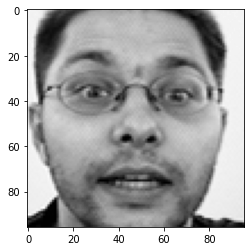

In [20]:
# 테스트 데이터 첫번째 이미지 확인
plt.imshow(X_test[0].reshape(96,96),cmap = 'gray')
plt.show()
# 결과 예측
pred = model.predict(X_test)

In [21]:
# 제출 파일 만들기
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [22]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [23]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [24]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [25]:
rowid = pd.Series(rowid,name = 'RowId')

In [26]:
loc = pd.Series(preded,name = 'Location')

In [27]:
submission = pd.concat([rowid,loc],axis = 1)

In [28]:
submission.to_csv('face_key_detection_submission.csv',index = False)